In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('covid-19(India).csv')
#df['Date']=pd.to_datetime(df.Date)
#df.sort_values(by='Date')
dt=df.groupby(['Date'], sort=False)['Infected'].agg(np.sum).reset_index()
dt['confirmed']=dt['Infected'].cumsum()
dt

,Date,Infected,confirmed
0,03-02-2020,3,3
1,02-03-2020,2,5
2,03-03-2020,2,7
3,04-03-2020,20,27
4,05-03-2020,1,28
...,...,...,...
81,24-05-2020,7627,139049
82,25-05-2020,6305,145354
83,26-05-2020,6619,151973
84,27-05-2020,6924,158897


In [3]:
dt['days']=np.arange(0, len(dt), 1)
data=dt[['days', 'confirmed']]
data

,days,confirmed
0,0,3
1,1,5
2,2,7
3,3,27
4,4,28
...,...,...
81,81,139049
82,82,145354
83,83,151973
84,84,158897


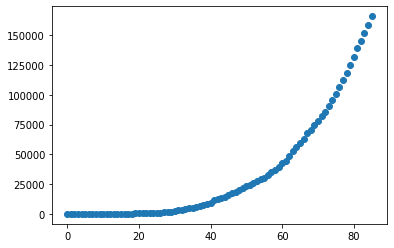

In [4]:
plt.scatter(data['days'], data['confirmed'])

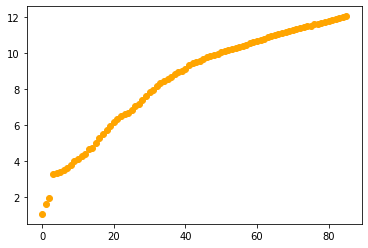

In [5]:
plt.scatter(data['days'], np.log(data['confirmed']), color='orange')

In [6]:
X, Y=np.array(data['days']).reshape(-1, 1), np.array(np.log(data['confirmed'])).reshape(-1, 1)
reg=LinearRegression()
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

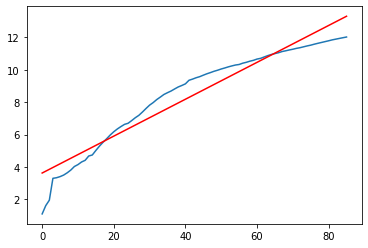

In [7]:
plt.plot(X, Y)
Y_pred=reg.predict(X)
prediction_space= ([min(X), max(X)])
plt.plot(prediction_space, [min(Y_pred), max(Y_pred)], color='red')

m=(max(Y_pred)-min(Y_pred))/(max(X)-min(X))

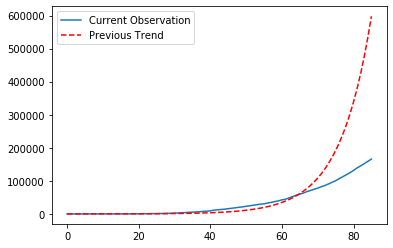

In [8]:
plt.plot(data['days'], data['confirmed'], label='Current Observation')
Y_pred=np.exp(reg.predict(X))
plt.plot(X, Y_pred, color='red', linestyle='dashed', label='Previous Trend')
plt.legend()

In [9]:
test=np.arange(len(data), len(data)+21, 1)
reg.score(X, Y)

0.9279182814679781

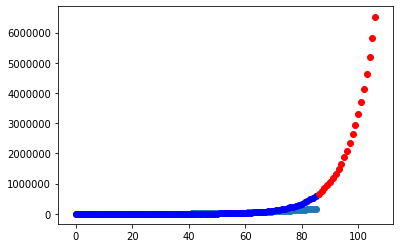

In [10]:
plt.scatter(data['days'], data['confirmed'])
Y_pred=np.exp(reg.predict(X))
plt.scatter(X, Y_pred, color='blue')
plt.scatter(test, np.exp(reg.predict(test.reshape(-1, 1))), color='red')

In [11]:
future=np.arange(len(data), len(data)+21, 1)
predictions=np.exp(reg.predict(future.reshape(-1, 1)))
future, predictions

(array([ 86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
         99, 100, 101, 102, 103, 104, 105, 106]),
 array([[ 669892.17575724],
        [ 750674.73490924],
        [ 841198.89442516],
        [ 942639.39769822],
        [1056312.65088628],
        [1183693.80608005],
        [1326435.90453705],
        [1486391.32840579],
        [1665635.83932163],
        [1866495.51582642],
        [2091576.93918196],
        [2343801.01930265],
        [2626440.89977043],
        [2943164.43383037],
        [3298081.78258309],
        [3695798.75306192],
        [4141476.56836946],
        [4640898.84551837],
        [5200546.65015609],
        [5827682.60216816],
        [6530445.1236091 ]]))

In [12]:
dt=df.groupby(['Date'], sort=False)['Infected'].agg(np.sum).reset_index()
dt['confirmed']=dt['Infected'].cumsum()
#dt=dt.iloc[4:]
dt 

,Date,Infected,confirmed
0,03-02-2020,3,3
1,02-03-2020,2,5
2,03-03-2020,2,7
3,04-03-2020,20,27
4,05-03-2020,1,28
...,...,...,...
81,24-05-2020,7627,139049
82,25-05-2020,6305,145354
83,26-05-2020,6619,151973
84,27-05-2020,6924,158897


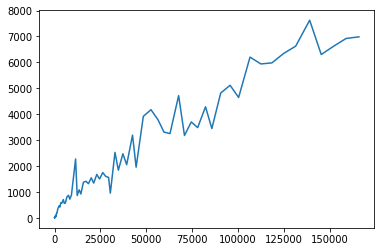

In [13]:
plt.plot(dt['confirmed'],dt['Infected'])

In [14]:
m

array([0.11385568])

In [15]:
1.0+m*14+m**2*24

array([2.90509432])

# State-Wise

In [16]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State           1650 non-null   object
 1   Place           1587 non-null   object
 2   Date            1650 non-null   object
 3   Time            1650 non-null   object
 4   Infected        1650 non-null   int64 
 5   Total_Infected  1650 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 77.5+ KB


In [17]:
df['State'].unique()

array(['Kerela', 'Delhi', 'Telangana', 'Rajasthan', 'Haryana',
       'Uttar Pradesh', 'Ladakh', 'Tamil Nadu', 'Jammu And Kashmir',
       'Punjab', 'Karnataka', 'Maharashtra', 'Andhra Pradesh', 'Odisha',
       'Uttarakhand', 'West Bengal', 'Pondicherry', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman And Nicobar', 'Goa',
       'Assam', 'Jharkhand', 'Arunachal Pradesh', 'Tripura',
       'Dadra And Nagar Haveli', 'Meghalaya', 'Nagaland', 'Unassigned',
       'Sikkim'], dtype=object)

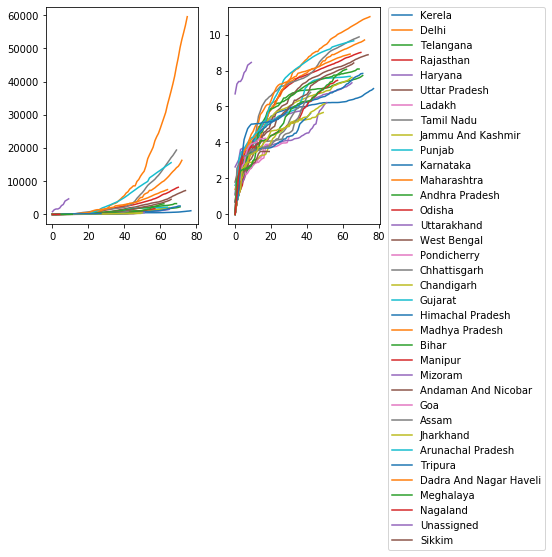

In [18]:
fig, ((ax1), (ax2))=plt.subplots(1,2)

def state(statename):
    statedata=df.loc[df['State']==statename]
    grouped=statedata.groupby(['Date'], sort=False)['Infected'].agg(np.sum).reset_index()
    grouped['confirmed']=grouped['Infected'].cumsum()
    ax1.plot(grouped.index, grouped['confirmed'], label=statename)
    #ax1.legend()
    ax2.plot(grouped.index, np.log(grouped['confirmed']), label=statename)
    #ax2.legend()

    return

for states in df['State'].unique():
    state(states)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.tight_layout(pad=10.0)    
plt.show()